# Imports, dictionary & loading datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [2]:
# Set display options to show numeric values without scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
plt.rcParams.update({
    'font.size': 14,          # Standard-Schriftgröße
    'axes.titlesize': 22,     # Titel-Größe
    'axes.labelsize': 18,     # Achsenbeschriftungsgröße
    'xtick.labelsize': 14,    # Beschriftungsgröße der x-Achse
    'ytick.labelsize': 14     # Beschriftungsgröße der y-Achse
})

In [4]:
ISO3166 = {
    'AD': ['Andorra', 'Andorra'],
    'AE': ['United Arab Emirates', 'Vereinigte Arabische Emirate'],
    'AF': ['Afghanistan', 'Afghanistan'],
    'AG': ['Antigua & Barbuda', 'Antigua und Barbuda'],
    'AI': ['Anguilla', 'Anguilla'],
    'AL': ['Albania', 'Albanien'],
    'AM': ['Armenia', 'Armenien'],
    'AN': ['Netherlands Antilles', 'Niederländische Antillen'],
    'AO': ['Angola', 'Angola'],
    'AQ': ['Antarctica', 'Antarktis'],
    'AR': ['Argentina', 'Argentinien'],
    'AS': ['American Samoa', 'Amerikanisch-Samoa'],
    'AT': ['Austria', 'Österreich'],
    'AU': ['Australia', 'Australien'],
    'AW': ['Aruba', 'Aruba'],
    'AZ': ['Azerbaijan', 'Aserbaidschan'],
    'BA': ['Bosnia and Herzegovina', 'Bosnien und Herzegowina'],
    'BB': ['Barbados', 'Barbados'],
    'BD': ['Bangladesh', 'Bangladesch'],
    'BE': ['Belgium', 'Belgien'],
    'BF': ['Burkina Faso', 'Burkina Faso'],
    'BG': ['Bulgaria', 'Bulgarien'],
    'BH': ['Bahrain', 'Bahrain'],
    'BI': ['Burundi', 'Burundi'],
    'BJ': ['Benin', 'Benin'],
    'BM': ['Bermuda', 'Bermuda'],
    'BN': ['Brunei Darussalam', 'Brunei'],
    'BO': ['Bolivia', 'Bolivien', 'Bolivia (Plurinational State of)'],
    'BR': ['Brazil', 'Brasilien'],
    'BS': ['Bahama', 'Bahamas'],
    'BT': ['Bhutan', 'Bhutan'],
    'BU': ['Burma (no longer exists)', 'Birma (nicht mehr existiert)'],
    'BV': ['Bouvet Island', 'Bouvetinsel'],
    'BW': ['Botswana', 'Botswana'],
    'BY': ['Belarus', 'Weißrussland'],
    'BZ': ['Belize', 'Belize'],
    'CA': ['Canada', 'Kanada'],
    'CC': ['Cocos (Keeling) Islands', 'Kokosinseln'],
    'CF': ['Central African Republic', 'Zentralafrikanische Republik'],
    'CG': ['Congo', 'Kongo','Democratic Republic of the Congo'],
    'CH': ['Switzerland', 'Schweiz'],
    'CI': ["Côte D'ivoire (Ivory Coast)", 'Elfenbeinküste', 'Ivory Coast', "Côte d'Ivoire"],
    'CK': ['Cook Iislands', 'Cookinseln'],
    'CL': ['Chile', 'Chile'],
    'CM': ['Cameroon', 'Kamerun'],
    'CN': ['China', 'China', 'China, mainland'],
    'CO': ['Colombia', 'Kolumbien'],
    'CR': ['Costa Rica', 'Costa Rica'],
    'CS': ['Serbia', 'Montenegro', 'Serbien', 'Montenegro'],
    'CU': ['Cuba', 'Kuba'],
    'CV': ['Cape Verde', 'Kap Verde'],
    'CX': ['Christmas Island', 'Weihnachtsinsel'],
    'CY': ['Cyprus', 'Zypern'],
    'CZ': ['Czech Republic', 'Czechia', 'Tschechische Republik', 'Tschechien'],
    'DD': ['German Democratic Republic (no longer exists)', 'Deutsche Demokratische Republik (nicht mehr existiert)'],
    'DE': ['Germany', 'Deutschland'],
    'DJ': ['Djibouti', 'Dschibuti'],
    'DK': ['Denmark', 'Dänemark'],
    'DM': ['Dominica', 'Dominica'],
    'DO': ['Dominican Republic', 'Dominikanische Republik'],
    'DZ': ['Algeria', 'Algerien'],
    'EC': ['Ecuador', 'Ecuador'],
    'EE': ['Estonia', 'Estland'],
    'EG': ['Egypt', 'Ägypten'],
    'EH': ['Western Sahara', 'Westsahara'],
    'ER': ['Eritrea', 'Eritrea'],
    'ES': ['Spain', 'Spanien'],
    'ET': ['Ethiopia', 'Äthiopien', 'Ethiopia PDR'],
    'FI': ['Finland', 'Finnland'],
    'FJ': ['Fiji', 'Fidschi'],
    'FK': ['Falkland Islands (Malvinas)', 'Falklandinseln (Malwinen)'],
    'FM': ['Micronesia', 'Mikronesien'],
    'FO': ['Faroe Islands', 'Färöer'],
    'FR': ['France', 'Frankreich'],
    'FX': ['France, Metropolitan', 'Frankreich, Metropolitan'],
    'GA': ['Gabon', 'Gabun'],
    'GB': ['United Kingdom', 'Vereinigtes Königreich'],
    'GD': ['Grenada', 'Grenada'],
    'GE': ['Georgia', 'Georgien'],
    'GF': ['French Guiana', 'Französisch-Guayana'],
    'GH': ['Ghana', 'Ghana'],
    'GI': ['Gibraltar', 'Gibraltar'],
    'GL': ['Greenland', 'Grönland'],
    'GM': ['Gambia', 'Gambia'],
    'GN': ['Guinea', 'Guinea'],
    'GP': ['Guadeloupe', 'Guadeloupe'],
    'GQ': ['Equatorial Guinea', 'Äquatorialguinea'],
    'GR': ['Greece', 'Griechenland'],
    'GS': ['South Georgia and the South Sandwich Islands', 'Südgeorgien und die Südlichen Sandwichinseln'],
    'GT': ['Guatemala', 'Guatemala'],
    'GU': ['Guam', 'Guam'],
    'GW': ['Guinea-Bissau', 'Guinea-Bissau'],
    'GY': ['Guyana', 'Guyana'],
    'HK': ['Hong Kong', 'Hongkong'],
    'HM': ['Heard & McDonald Islands', 'Heard- und McDonald-Inseln'],
    'HN': ['Honduras', 'Honduras'],
    'HR': ['Croatia', 'Kroatien'],
    'HT': ['Haiti', 'Haiti'],
    'HU': ['Hungary', 'Ungarn'],
    'ID': ['Indonesia', 'Indonesien'],
    'IE': ['Ireland', 'Irland'],
    'IL': ['Israel', 'Israel'],
    'IN': ['India', 'Indien'],
    'IO': ['British Indian Ocean Territory', 'Britisches Territorium im Indischen Ozean'],
    'IQ': ['Iraq', 'Irak'],
    'IR': ['Iran (Islamic Republic of)', 'Iran'],
    'IS': ['Iceland', 'Island'],
    'IT': ['Italy', 'Italien'],
    'JM': ['Jamaica', 'Jamaika'],
    'JO': ['Jordan', 'Jordanien'],
    'JP': ['Japan', 'Japan'],
    'KE': ['Kenya', 'Kenia'],
    'KG': ['Kyrgyzstan', 'Kirgisistan'],
    'KH': ['Cambodia', 'Kambodscha'],
    'KI': ['Kiribati', 'Kiribati'],
    'KM': ['Comoros', 'Komoren'],
    'KN': ['St. Kitts and Nevis', 'St. Kitts und Nevis'],
    'KP': ['North Korea', 'Nordkorea', "Democratic People's Republic of Korea"],
    'KR': ['South Korea', 'Südkorea'],
    'KW': ['Kuwait', 'Kuwait'],
    'KY': ['Cayman Islands', 'Kaimaninseln'],
    'KZ': ['Kazakhstan', 'Kasachstan'],
    'LA': ["Lao People's Democratic Republic", 'Laos'],
    'LB': ['Lebanon', 'Libanon'],
    'LC': ['Saint Lucia', 'St. Lucia'],
    'LI': ['Liechtenstein', 'Liechtenstein'],
    'LK': ['Sri Lanka', 'Sri Lanka'],
    'LR': ['Liberia', 'Liberia'],
    'LS': ['Lesotho', 'Lesotho'],
    'LT': ['Lithuania', 'Litauen'],
    'LU': ['Luxembourg', 'Luxemburg'],
    'LV': ['Latvia', 'Lettland'],
    'LY': ['Libya', 'Libyen'],
    'MA': ['Morocco', 'Marokko'],
    'MC': ['Monaco', 'Monaco'],
    'MD': ['Moldova', 'Moldawien', 'Republic of Moldova'],
    'MG': ['Madagascar', 'Madagaskar'],
    'MH': ['Marshall Islands', 'Marshallinseln'],#
    'MK': ['North Macedonia', 'Nordmazedonien'],
    'ML': ['Mali', 'Mali'],
    'MN': ['Mongolia', 'Mongolei'],
    'MM': ['Myanmar', 'Myanmar'],
    'MO': ['Macau', 'Macau'],
    'MP': ['Northern Mariana Islands', 'Nördliche Marianen'],
    'MQ': ['Martinique', 'Martinique'],
    'MR': ['Mauritania', 'Mauretanien'],
    'MS': ['Montserrat', 'Montserrat'],
    'MT': ['Malta', 'Malta'],
    'MU': ['Mauritius', 'Mauritius'],
    'MV': ['Maldives', 'Malediven'],
    'MW': ['Malawi', 'Malawi'],
    'MX': ['Mexico', 'Mexiko'],
    'MY': ['Malaysia', 'Malaysia'],
    'MZ': ['Mozambique', 'Mosambik'],
    'NA': ['Namibia', 'Namibia'],
    'NC': ['New Caledonia', 'Neukaledonien'],
    'NE': ['Niger', 'Niger'],
    'NF': ['Norfolk Island', 'Norfolkinsel'],
    'NG': ['Nigeria', 'Nigeria'],
    'NI': ['Nicaragua', 'Nicaragua'],
    'NL': ['Netherlands', 'Niederlande'],
    'NO': ['Norway', 'Norwegen'],
    'NP': ['Nepal', 'Nepal'],
    'NR': ['Nauru', 'Nauru'],
    'NT': ['Neutral Zone (no longer exists)', 'Neutralzone (existiert nicht mehr)'],
    'NU': ['Niue', 'Niue'],
    'NZ': ['New Zealand', 'Neuseeland'],
    'OM': ['Oman', 'Oman'],
    'PA': ['Panama', 'Panama'],
    'PE': ['Peru', 'Peru'],
    'PF': ['French Polynesia', 'Französisch-Polynesien'],
    'PG': ['Papua New Guinea', 'Papua-Neuguinea'],
    'PH': ['Philippines', 'Philippinen'],
    'PK': ['Pakistan', 'Pakistan'],
    'PL': ['Poland', 'Polen'],
    'PM': ['St. Pierre & Miquelon', 'St. Pierre und Miquelon'],
    'PN': ['Pitcairn', 'Pitcairn'],
    'PS': ['Palestine', 'Palestina', 'State of Palestine'],
    'PR': ['Puerto Rico', 'Puerto Rico'],
    'PT': ['Portugal', 'Portugal'],
    'PW': ['Palau', 'Palau'],
    'PY': ['Paraguay', 'Paraguay'],
    'QA': ['Qatar', 'Katar'],
    'RE': ['Réunion', 'Réunion'],
    'RO': ['Romania', 'Rumänien'],
    'RU': ['Russian Federation', 'Russische Föderation', 'Russia', 'Russland'],
    'RW': ['Rwanda', 'Ruanda'],
    'SA': ['Saudi Arabia', 'Saudi-Arabien'],
    'SB': ['Solomon Islands', 'Salomonen'],
    'SC': ['Seychelles', 'Seychellen'],
    'SD': ['Sudan', 'Sudan', 'Sudan (former)'],
    'SE': ['Sweden', 'Schweden'],
    'SG': ['Singapore', 'Singapur'],
    'SH': ['St. Helena', 'St. Helena'],
    'SI': ['Slovenia', 'Slowenien'],
    'SJ': ['Svalbard & Jan Mayen Islands', 'Svalbard und Jan Mayen'],
    'SK': ['Slovakia', 'Slowakei'],
    'SL': ['Sierra Leone', 'Sierra Leone'],
    'SM': ['San Marino', 'San Marino'],
    'SN': ['Senegal', 'Senegal'],
    'SO': ['Somalia', 'Somalia'],
    'SR': ['Suriname', 'Suriname'],
    'SS': ['South Sudan','Südsudan'],
    'ST': ['Sao Tome & Principe', 'São Tomé und Príncipe'],
    'SU': ['Union of Soviet Socialist Republics (no longer exists)', 'Sowjetunion (existiert nicht mehr)'],
    'SV': ['El Salvador', 'El Salvador'],
    'SY': ['Syrian Arab Republic', 'Syria', 'Syrien'],
    'SZ': ['Swaziland', 'Swasiland', 'Eswatini'],
    'TC': ['Turks & Caicos Islands', 'Turks- und Caicosinseln'],
    'TD': ['Chad', 'Tschad'],
    'TF': ['French Southern Territories', 'Französische Süd- und Antarktisgebiete'],
    'TG': ['Togo', 'Togo'],
    'TH': ['Thailand', 'Thailand'],
    'TJ': ['Tajikistan', 'Tadschikistan'],
    'TK': ['Tokelau', 'Tokelau'],
    'TM': ['Turkmenistan', 'Turkmenistan'],
    'TN': ['Tunisia', 'Tunesien'],
    'TO': ['Tonga', 'Tonga'],
    'TP': ['East Timor', 'Osttimor'],
    'TR': ['Turkey', 'Türkei', 'Turkiye'],
    'TT': ['Trinidad & Tobago', 'Trinidad und Tobago', 'Trinidad and Tobago'],
    'TV': ['Tuvalu', 'Tuvalu'],
    'TW': ['Taiwan, Province of China', 'Taiwan', 'China, Taiwan Province of', 'Taiwan Province of China'],
    'TZ': ['Tanzania, United Republic of', 'Tansania', 'Tanzania', 'United Republic of Tanzania'],
    'UA': ['Ukraine', 'Ukraine'],
    'UG': ['Uganda', 'Uganda'],
    'UK': ['United Kingdom', 'Vereinigtes Königreich'],
    'UM': ['United States Minor Outlying Islands', 'United States Minor Outlying Islands'],
    'US': ['United States of America', 'United States', 'Vereinigte Staaten von Amerika', 'USA'],
    'UY': ['Uruguay', 'Uruguay'],
    'UZ': ['Uzbekistan', 'Usbekistan'],
    'VA': ['Vatican City State (Holy See)', 'Holy See', 'Vatikanstadt'],
    'VC': ['St. Vincent & the Grenadines', 'St. Vincent und die Grenadinen'],
    'VE': ['Venezuela', 'Venezuela'],
    'VG': ['British Virgin Islands', 'Britische Jungferninseln'],
    'VI': ['United States Virgin Islands', 'Amerikanische Jungferninseln'],
    'VN': ['Viet Nam', 'Vietnam'],
    'VU': ['Vanuatu', 'Vanuatu'],
    'WF': ['Wallis & Futuna Islands', 'Wallis und Futuna'],
    'WS': ['Samoa', 'Samoa'],
    'XK': ['Kosovo'],
    'YE': ['Yemen', 'Jemen'],
    'YT': ['Mayotte', 'Mayotte'],
    'YU': ['Yugoslavia', 'Jugoslawien'],
    'ZA': ['South Africa', 'Südafrika'],
    'ZM': ['Zambia', 'Sambia'],
    'ZR': ['Zaire', 'Zaire'],
    'ZW': ['Zimbabwe', 'Simbabwe'],
    'ZZ': ['Unknown or unspecified country', 'Unbekanntes oder nicht spezifiziertes Land'],
}

In [5]:
# reveresed dictionary for country names for renaming
reversed_ISO3166 = {}
for code, names in ISO3166.items():
    country_name = names[0]  # Hier wird der vollständige Ländername ausgewählt
    reversed_ISO3166[country_name] = code

In [6]:
person = "wilma"
if person == "dario":

    your_path = r"C:\Users\dario\Desktop\Studium\Studium Semester XXIV (Data Science)\Visualization\Project\\"
    
else:    
    your_path = r"/home/wilma/visualization/forked/VisualizationProj23/Data/"

df_happiness = pd.read_csv(your_path + 'World Happiness Report.csv')

df_death_causes = pd.read_csv(your_path + 'causes of death till 2019.csv', header=1)

df_internet_users = pd.read_csv(your_path + 'Internet Users percent of population.csv')

df_population = pd.read_csv(your_path + 'population.csv')

df_gdp = pd.read_csv(your_path + 'GDP DATA.csv', header=2)

df_inequality = pd.read_csv(your_path + 'Income_inequality.csv', encoding='latin1')

df_environment = pd.read_csv(your_path + 'Environment_Temperature_change_E_All_Data_NOFLAG.csv', encoding='latin1')
df_latitude_longitude = pd.read_csv(your_path + "latitude_longitude.csv", encoding='latin1')

In [7]:
# needs to be changed before pre-processing
df_latitude_longitude = df_latitude_longitude.drop(columns='country')
df_latitude_longitude.rename(columns={'name': 'country'}, inplace=True)

Liste, für dataframes, die nach country columns gecheckt und ggf encoded werden sollen. 

# Pre-Processing

## Check usability of data and set naming conventions

In [8]:
dataframes = ['df_happiness', 'df_death_causes', 'df_internet_users', 'df_population', 'df_gdp', 'df_inequality', 'df_environment', 'df_latitude_longitude']

In [9]:
# rename columns such that it is possible to use dot access

df_happiness.rename(columns={'Country Name': 'country',
                             'Life Ladder': 'happiness_score',
                             'Freedom To Make Life Choices': 'freedom',
                             'Perceptions Of Corruption': 'perception_corruption',
                             'Log GDP Per Capita': 'log_gdp',
                             'Social Support': 'social_support',
                             'Healthy Life Expectancy At Birth': 'birth_health',
                             'Regional Indicator': 'regional_indicator',
                             'Confidence In National Government': 'government_confidence',
                             'Generosity': 'generosity', 'Year': 'year'}, inplace=True)

In [10]:
# change different names for "country" to "country" to match dataframes correctly

df_with_country_column = []

for df_name in dataframes:
    df = globals()[df_name]
    column_name = None
    for col in df.columns:
        if col.lower() in ['country', 'country name', 'country/region', 'area']:
            column_name = col
            break
    if column_name is not None:
        # Make a copy of the dataframe slice to avoid SettingWithCopyWarning
        df = df[df[column_name].isin(df_happiness['country'].unique())].copy()
        df.rename(columns={column_name: 'country'}, inplace=True)
        globals()[df_name] = df
        df_with_country_column.append(df_name)

In [11]:
# Flatten the ISO3166 dictionary to handle lists in values
flattened_ISO3166 = {}
for key, value in ISO3166.items():
    if isinstance(value, list):
        for sub_value in value:
            flattened_ISO3166[sub_value.lower()] = key
    else:
        flattened_ISO3166[value.lower()] = key

# Create a set to keep track of unknown country values
unknown_countries = set()

# Iterate through the dataframes and update the 'country' column
for df_name in df_with_country_column:
    df = globals()[df_name]
    country_column = df['country']
    for index, row in df.iterrows():
        country = row.country
        
        if isinstance(country, list):
            for i, sub_country in enumerate(country):
                if sub_country.lower() in flattened_ISO3166:
                    df.loc[index, 'country'][i] = flattened_ISO3166[sub_country.lower()]
                else:
                    if sub_country not in unknown_countries:
                        print(f"Unknown country value: {sub_country}")
                        unknown_countries.add(sub_country)
        else:
            if country.lower() in flattened_ISO3166:
                df.loc[index, 'country'] = flattened_ISO3166[country.lower()]
            else:
                if country not in unknown_countries:
                    print(f"Unknown country value: {country}")
                    unknown_countries.add(country)
    globals()[df_name] = df

Unknown country value: Congo (Brazzaville)
Unknown country value: Congo (Kinshasa)
Unknown country value: Hong Kong S.A.R. of China
Unknown country value: Somaliland region


In [12]:
# Flatten the ISO3166 dictionary to handle lists in values
flattened_reversed_ISO3166 = {}
for key, value in reversed_ISO3166.items():
    if isinstance(value, list):
        for sub_value in value:
            flattened_reversed_ISO3166[sub_value.lower()] = key
    else:
        flattened_reversed_ISO3166[value.lower()] = key

# Create a set to keep track of unknown country values
unknown_countries = set()

# Iterate through the dataframes and update the 'country' column
for df_name in df_with_country_column:
    df = globals()[df_name]
    country_column = df['country']
    for index, row in df.iterrows():
        country = row.country
        
        if isinstance(country, list):
            for i, sub_country in enumerate(country):
                if sub_country.lower() in flattened_reversed_ISO3166:
                    df.loc[index, 'country'][i] = flattened_reversed_ISO3166[sub_country.lower()]
                else:
                    if sub_country not in unknown_countries:
                        print(f"Unknown country value: {sub_country}")
                        unknown_countries.add(sub_country)
        else:
            if country.lower() in flattened_reversed_ISO3166:
                df.loc[index, 'country'] = flattened_reversed_ISO3166[country.lower()]
            else:
                if country not in unknown_countries:
                    print(f"Unknown country value: {country}")
                    unknown_countries.add(country)
    globals()[df_name] = df

Unknown country value: Congo (Brazzaville)
Unknown country value: Congo (Kinshasa)
Unknown country value: Hong Kong S.A.R. of China
Unknown country value: Somaliland region


In [13]:
# identify the countries that exist in all the data sets

common_countries = set(df_happiness['country'].unique())

for df_name in dataframes:
    df = globals()[df_name]
    column_name = None
    for col in df.columns:
        if col.lower() == 'country' or col.lower() == 'country name':
            column_name = col
            break
    if column_name is not None:
        countries = set(df[column_name].unique())
        common_countries = common_countries.intersection(countries)

common_countries_list = ", ".join(sorted(common_countries))

print("Common Countries:", common_countries_list)
print("All countries appearing here are in all datasets.")

Common Countries: Afghanistan, Albania, Algeria, Angola, Argentina, Armenia, Australia, Austria, Azerbaijan, Bahrain, Bangladesh, Belarus, Belgium, Belize, Benin, Bhutan, Bosnia and Herzegovina, Botswana, Brazil, Bulgaria, Burkina Faso, Burundi, Cambodia, Cameroon, Canada, Central African Republic, Chad, Chile, China, Colombia, Comoros, Costa Rica, Croatia, Cuba, Cyprus, Denmark, Djibouti, Dominican Republic, Ecuador, El Salvador, Estonia, Ethiopia, Finland, France, Gabon, Georgia, Germany, Ghana, Greece, Guatemala, Guinea, Guyana, Haiti, Honduras, Hungary, Iceland, India, Indonesia, Iraq, Ireland, Israel, Italy, Jamaica, Japan, Jordan, Kazakhstan, Kenya, Kuwait, Latvia, Lebanon, Lesotho, Liberia, Libya, Lithuania, Luxembourg, Madagascar, Malawi, Malaysia, Maldives, Mali, Malta, Mauritania, Mauritius, Mexico, Mongolia, Morocco, Mozambique, Namibia, Nepal, Netherlands, New Zealand, Nicaragua, Niger, Nigeria, Norway, Oman, Pakistan, Panama, Paraguay, Peru, Philippines, Poland, Portugal, 

## Clean additional datasets

In [14]:
# clean internet user data
df_internet_users_clean = df_internet_users.drop(['Country Code'], axis=1)
df_internet_users_clean = df_internet_users_clean.melt(id_vars=['country'], var_name='year', value_name='percent_internet_users')
df_internet_users_clean = df_internet_users_clean.groupby(['country', 'year']).mean().reset_index()
df_internet_users_clean['year'] = df_internet_users_clean['year'].astype(int)
df_internet_users_clean.head()

,country,year,percent_internet_users
0,Afghanistan,1990,0.00
1,Afghanistan,1991,0.00
2,Afghanistan,1992,0.00
3,Afghanistan,1993,0.00
4,Afghanistan,1994,0.00


In [15]:
# clean gdp data

df_gdp_clean = df_gdp.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1)
df_gdp_clean = df_gdp_clean.melt(id_vars=['country'], var_name='year', value_name='gdp')
df_gdp_clean = df_gdp_clean.dropna()
df_gdp_clean['gdp'] = df_gdp_clean['gdp'].str.replace(',', '').astype(float)
df_gdp_clean = df_gdp_clean.groupby(['country', 'year']).mean().reset_index()
df_gdp_clean['year'] = df_gdp_clean['year'].astype(int)
df_gdp_clean.head()

,country,year,gdp
0,Afghanistan,1960,537777811.00
1,Afghanistan,1961,548888896.00
2,Afghanistan,1962,546666678.00
3,Afghanistan,1963,751111191.00
4,Afghanistan,1964,800000044.00


In [16]:
# country location will be integrated into the population dataframe
df_latitude_longitude.head()

,latitude,longitude,country
1,23.42,53.85,United Arab Emirates
2,33.94,67.71,Afghanistan
5,41.15,20.17,Albania
6,40.07,45.04,Armenia
8,-11.20,17.87,Angola


In [17]:
# clean population data

specified_columns = ['2022 Population', '2020 Population', '2015 Population', '2010 Population', '2000 Population', '1990 Population', '1980 Population', '1970 Population']
df_population.rename(columns=lambda x: x.split()[0] if x in specified_columns else x, inplace=True)

df_population_clean = df_population[['country', '2022', '2020', '2015', '2010', '2000', 'Area (km²)']]

df_population_clean = df_population_clean.melt(id_vars=['country', 'Area (km²)'], var_name='year', value_name='population')
df_population_clean['year'] = df_population_clean['year'].astype(int)
df_population_clean['population density'] = df_population_clean['population'] / df_population_clean['Area (km²)']

# Sort the dataframe by 'country' and 'year' columns in ascending order
df_population_clean = df_population_clean.sort_values(by=['country', 'year'], ascending=[True, True])

# join latitude and longitude data
df_population_clean = df_population_clean.merge(df_latitude_longitude, on='country', how='inner')
df_population_clean = df_population_clean.reset_index(drop=True)

df_population_clean.head()

,country,Area (km²),year,population,population density,latitude,longitude
0,Afghanistan,652230,2000,19542982,29.96,33.94,67.71
1,Afghanistan,652230,2010,28189672,43.22,33.94,67.71
2,Afghanistan,652230,2015,33753499,51.75,33.94,67.71
3,Afghanistan,652230,2020,38972230,59.75,33.94,67.71
4,Afghanistan,652230,2022,41128771,63.06,33.94,67.71


In [18]:
# clean inequality data

df_inequality_clean = df_inequality[['country', 'year', 'gini_reported']]

# Duplikate entfernen
df_inequality_clean = df_inequality_clean.drop_duplicates(subset=['country', 'year'])
df_inequality_clean = df_inequality_clean.reset_index(drop=True)

df_inequality_clean.head()

,country,year,gini_reported
0,Afghanistan,2008,29.00
1,Afghanistan,2012,33.00
2,Afghanistan,2017,31.00
3,Albania,1996,27.01
4,Albania,2002,31.74


In [19]:
# clean death causes data

df_death_causes_clean = df_death_causes.rename(columns={'Year': 'year', 'Both sexes': 'Probability (%) of dying between age 30 and exact age 70 from illness (all)', 'Male': 'Probability (%) of dying between age 30 and exact age 70 from illness (male)', 'Female': 'Probability (%) of dying between age 30 and exact age 70 from illness (female)', 
                                                        'Both sexes.1': 'Suicides per 100000 (all)', 'Male.1': 'Suicides per 100000 (male)', 'Female.1': 'Suicides per 100000 (female)'})

for column in df_death_causes_clean.columns[2:]:
    df_death_causes_clean[column] = df_death_causes_clean[column].str.split('[').str[0].str.strip()
    
# Sort the dataframe by 'country' and 'year' columns in ascending order
df_death_causes_clean = df_death_causes_clean.sort_values(by=['country', 'year'], ascending=[True, True])
df_death_causes_clean = df_death_causes_clean.reset_index(drop=True)

# Convert objects to float
df_death_causes_clean['Probability (%) of dying between age 30 and exact age 70 from illness (all)'] = df_death_causes_clean['Probability (%) of dying between age 30 and exact age 70 from illness (all)'].astype(float)
df_death_causes_clean['Probability (%) of dying between age 30 and exact age 70 from illness (male)'] = df_death_causes_clean['Probability (%) of dying between age 30 and exact age 70 from illness (male)'].astype(float)
df_death_causes_clean['Probability (%) of dying between age 30 and exact age 70 from illness (female)'] = df_death_causes_clean['Probability (%) of dying between age 30 and exact age 70 from illness (female)'].astype(float)
df_death_causes_clean['Suicides per 100000 (all)'] = df_death_causes_clean['Suicides per 100000 (all)'].astype(float)
df_death_causes_clean['Suicides per 100000 (male)'] = df_death_causes_clean['Suicides per 100000 (male)'].astype(float)
df_death_causes_clean['Suicides per 100000 (female)'] = df_death_causes_clean['Suicides per 100000 (female)'].astype(float)
    
df_death_causes_clean.head()

,country,year,Probability (%) of dying between age 30 and exact age 70 from illness (all),Probability (%) of dying between age 30 and exact age 70 from illness (male),Probability (%) of dying between age 30 and exact age 70 from illness (female),Suicides per 100000 (all),Suicides per 100000 (male),Suicides per 100000 (female)
0,Afghanistan,2000,41.70,43.90,39.40,4.90,5.00,4.80
1,Afghanistan,2001,42.10,44.10,40.10,5.00,5.20,4.80
2,Afghanistan,2002,42.10,43.60,40.50,5.00,5.40,4.60
3,Afghanistan,2003,41.50,42.90,40.10,5.00,5.30,4.60
4,Afghanistan,2004,41.40,42.50,40.20,5.00,5.40,4.60


In [20]:
# clean environmental data
df_environment_clean = df_environment[df_environment['Element'] == "Temperature change"]
df_environment_clean = df_environment_clean.drop(['Area Code', 'Months Code', 'Element Code', 'Element', 'Unit'], axis=1)
df_environment_clean = df_environment_clean.rename(columns=lambda x: x.replace('Y', ''))
df_environment_clean.rename(columns={'Area': 'country'}, inplace=True)
df_with_country_column.append('df_environment_clean')
df_environment_clean.head()

# Transpose the columns int rows using melt
df_environment_clean = df_environment_clean.melt(id_vars=['country', 'Months'], var_name='year', value_name='temperature_change')

# Rearrange the columns in the desired order'
df_environment_clean = df_environment_clean[['country', 'Months', 'year', 'temperature_change']]

# Group by country and year, calculate mean, and drop Months column
df_environment_clean = df_environment_clean.drop(['Months'], axis=1)
df_environment_clean = df_environment_clean.groupby(['country', 'year']).mean().reset_index()
df_environment_clean['year'] = df_environment_clean['year'].astype(int)

df_environment_clean.head()

,country,year,temperature_change
0,Afghanistan,1961,0.03
1,Afghanistan,1962,-0.20
2,Afghanistan,1963,0.89
3,Afghanistan,1964,-0.91
4,Afghanistan,1965,-0.05


# Combine data frames

In [21]:
dataframes = [df_happiness, df_death_causes_clean, df_internet_users_clean, df_population_clean, df_gdp_clean, df_inequality_clean, df_environment_clean]

In [22]:
# set equal timeframe for dataframes based on the time frame of df_happiness

# filter years from 2005 to 2022
filtered_dataframes = []
for df in dataframes:
    filtered_df = df[(df['year'] >= 2005) & (df['year'] <= 2022)]
    filtered_dataframes.append(filtered_df)

# reset index
for idx, df in enumerate(filtered_dataframes):
    filtered_dataframes[idx] = df.reset_index(drop=True)

df_happiness, df_death_causes_clean, df_internet_users_clean, df_population_clean, df_gdp_clean, df_inequality_clean, df_environment_clean = filtered_dataframes

In [23]:
def print_row_counts(dataframes):
    for idx, df in enumerate(dataframes):
        print(f"DataFrame {idx + 1} hat {len(df)} Zeilen.")

print_row_counts(dataframes)

DataFrame 1 hat 2199 Zeilen.
DataFrame 2 hat 2880 Zeilen.
DataFrame 3 hat 4672 Zeilen.
DataFrame 4 hat 765 Zeilen.
DataFrame 5 hat 7565 Zeilen.
DataFrame 6 hat 3209 Zeilen.
DataFrame 7 hat 8496 Zeilen.


In [24]:
dataframes = [df_death_causes_clean, df_internet_users_clean, df_population_clean, df_gdp_clean, df_inequality_clean, df_environment_clean]

new_dataframes = []

new_names = ['df_death_causes_combined', 'df_internet_users_combined', 'df_population_combined', 'df_gdp_combined', 'df_inequality_combined', 'df_environment_combined']

for df, new_name in zip(dataframes, new_names):
    new_df = pd.merge(df, df_happiness[['year', 'country', 'happiness_score']], on=["year", "country"], how="inner")
    new_dataframes.append(new_df)
    globals()[new_name] = new_df

# Access the new DataFrames
# df_death_causes_combined, df_divorce_rate_combined, df_internet_users_combined, and so on...

In [25]:
# merge population to calculate gdp per person
df_gdp_combined = df_gdp_combined.merge(df_population_combined[['country', 'year', 'population']], on=['country', 'year'], how='inner')
df_gdp_combined['GDP_per_person'] = round(df_gdp_combined['gdp'] / df_gdp_combined['population'],0)
df_gdp_combined = df_gdp_combined.drop(['population'], axis = 1)# find the index of the dataframe with the name 'df_gdp_combined' in new_dataframes
gdp_index = new_names.index('df_gdp_combined')

# update the respective dataframe in the list
new_dataframes[gdp_index] = df_gdp_combined


In [26]:
all_dataframes_combined = df_death_causes_combined

for df in new_dataframes[1:]:
    all_dataframes_combined = pd.merge(all_dataframes_combined, df, on=["country", "year", "happiness_score"], how= "inner")
    
all_dataframes_combined.dropna(inplace=True)
all_dataframes_combined = all_dataframes_combined.reset_index(drop=True)


# Exploratory data analysis

# numerical correlation: happiness x predictors

In [ ]:

# low correlation
for df in new_dataframes:
    print(df.corr()['happiness_score'].sort_values())

## Visual exploration

### Death causes

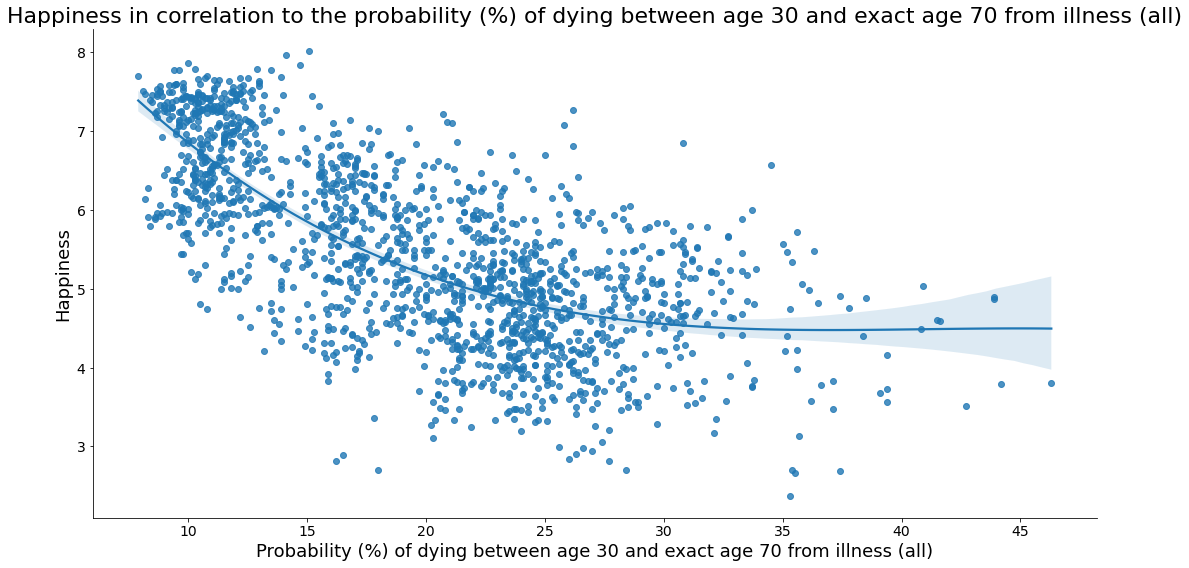

In [62]:
# Dying from illness and correlation to happiness 
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
ax= sns.regplot(data=df_death_causes_combined, x="Probability (%) of dying between age 30 and exact age 70 from illness (all)", y="happiness_score", order=3)

# Formatierung anpassen
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_ylim(0, 1)

plt.xlabel('Probability (%) of dying between age 30 and exact age 70 from illness (all)')
plt.ylabel('Happiness')

plt.title('Happiness in correlation to the probability (%) of dying between age 30 and exact age 70 from illness (all)')
plt.show()

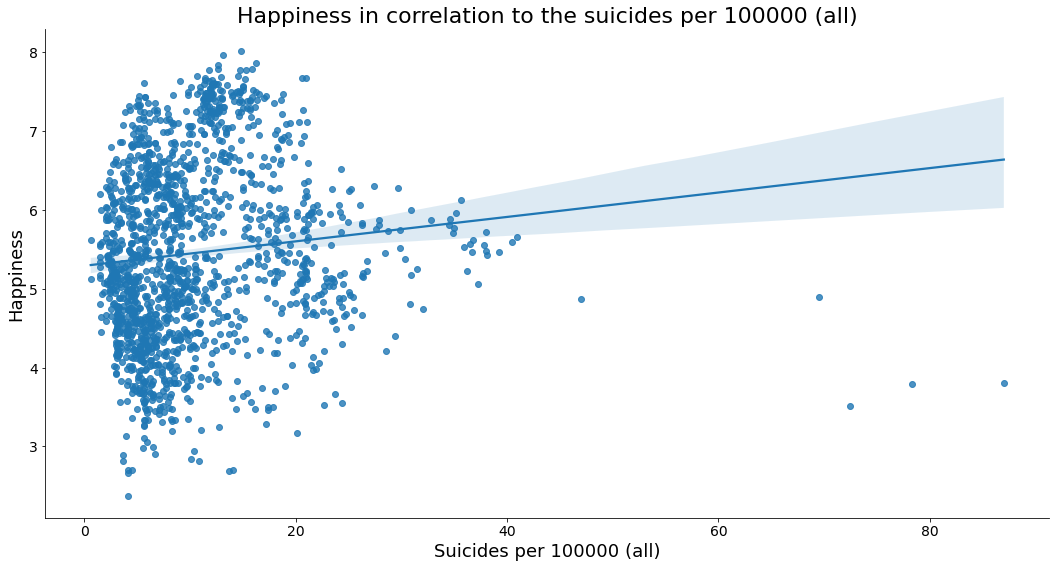

In [64]:
# Dying from suicide and correlation to happiness 
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
ax= sns.regplot(data=df_death_causes_combined, x="Suicides per 100000 (all)", y="happiness_score", order=1)

# Formatierung anpassen
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_ylim(0, 1)

plt.xlabel('Suicides per 100000 (all)')
plt.ylabel('Happiness')

plt.title('Happiness in correlation to the suicides per 100000 (all)')
plt.show()

### Internet users

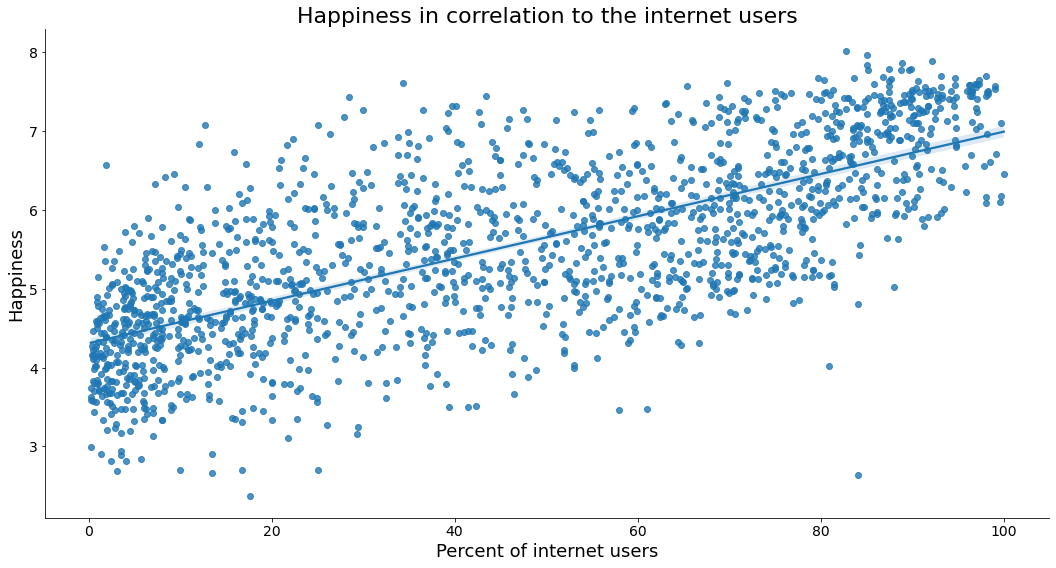

In [66]:
# Internet users
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
ax= sns.regplot(data=df_internet_users_combined, x="percent_internet_users", y="happiness_score", order=1)

# Formatierung anpassen
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_ylim(0, 1)

plt.xlabel('Percent of internet users')
plt.ylabel('Happiness')

plt.title('Happiness in correlation to the internet users')
plt.show()

### Population and country data

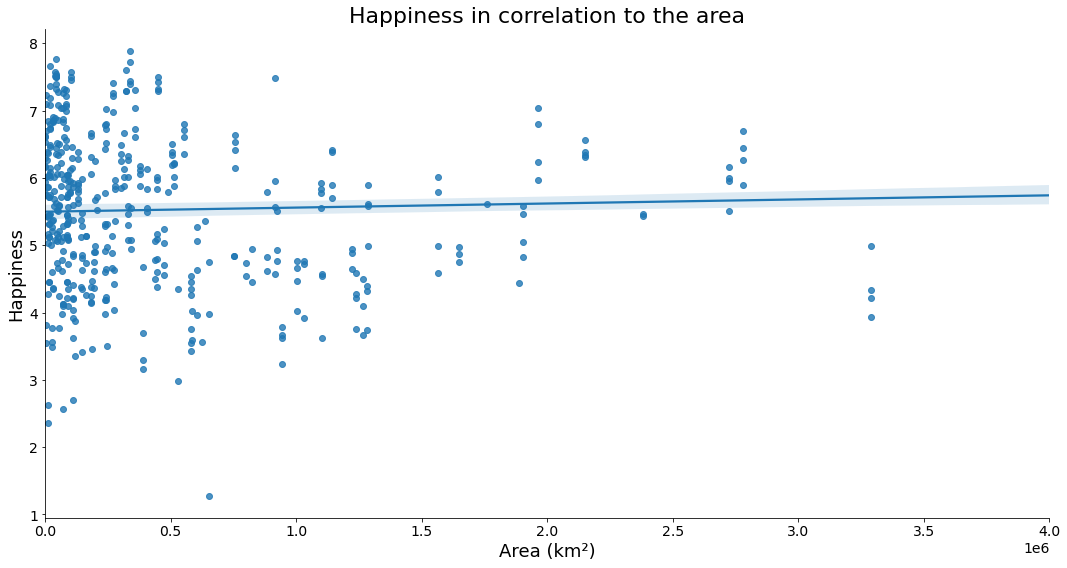

In [30]:
# Area
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
ax= sns.regplot(data=df_population_combined, x="Area (km²)", y="happiness_score", order=1)

# Formatierung anpassen
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(0, 4000000)

plt.xlabel('Area (km²)')
plt.ylabel('Happiness')

plt.title('Happiness in correlation to the area')
plt.show()

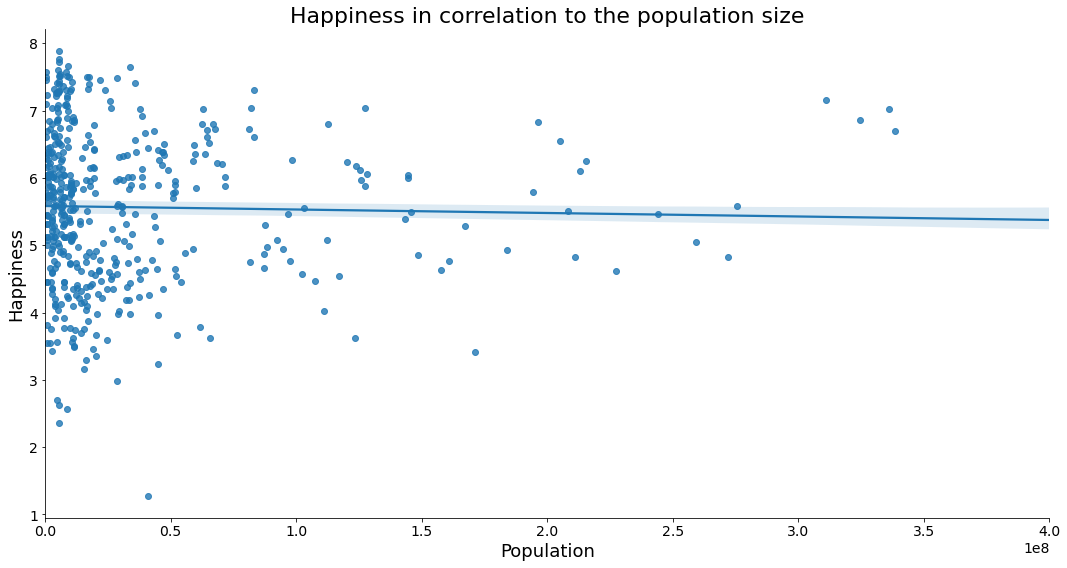

In [31]:
# Population
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
ax= sns.regplot(data=df_population_combined, x="population", y="happiness_score", order=1)

# Formatierung anpassen
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(0, 400000000)

plt.xlabel('Population')
plt.ylabel('Happiness')

plt.title('Happiness in correlation to the population size')
plt.show()

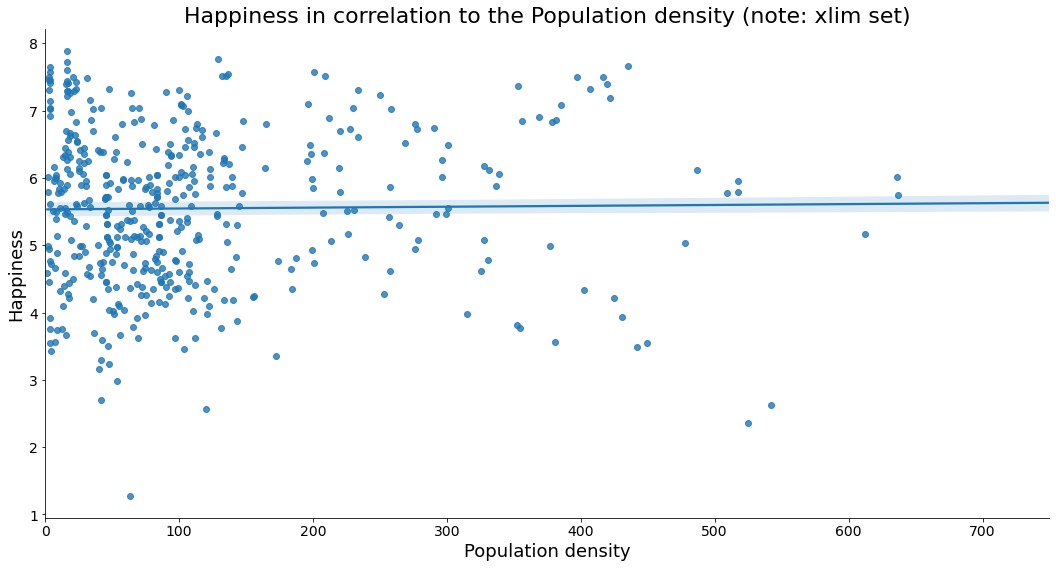

In [32]:
# Population density
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
ax= sns.regplot(data=df_population_combined, x="population density", y="happiness_score", order=1)

# Formatierung anpassen
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(0, 750)

plt.xlabel('Population density')
plt.ylabel('Happiness')

plt.title('Happiness in correlation to the Population density (note: xlim set)')
plt.show()

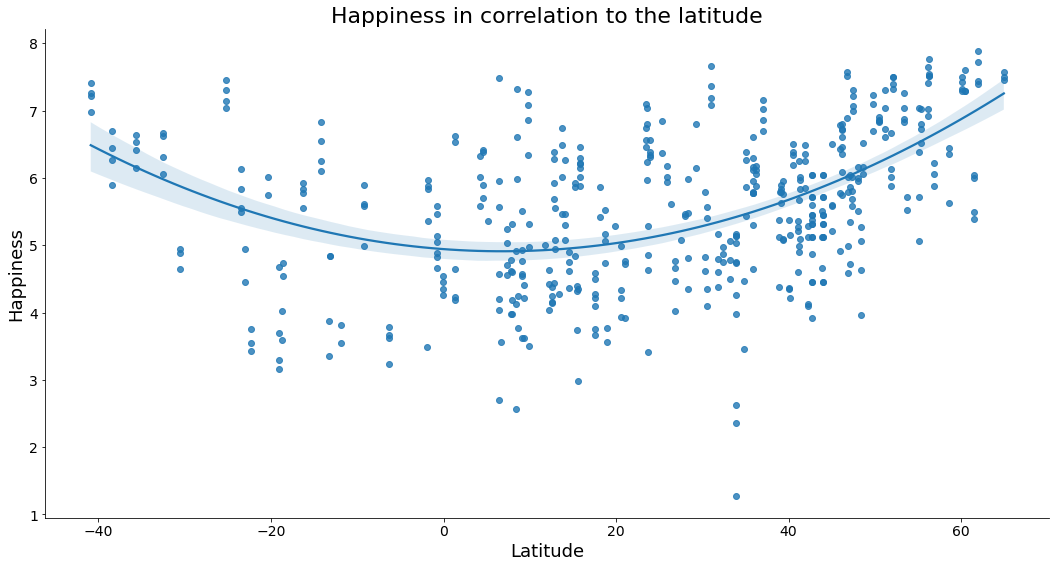

In [33]:
# Latitude
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
ax= sns.regplot(data=df_population_combined, x="latitude", y="happiness_score", order=2)

# Formatierung anpassen
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_ylim(0, 1)

plt.xlabel('Latitude')
plt.ylabel('Happiness')

plt.title('Happiness in correlation to the latitude')
plt.show()

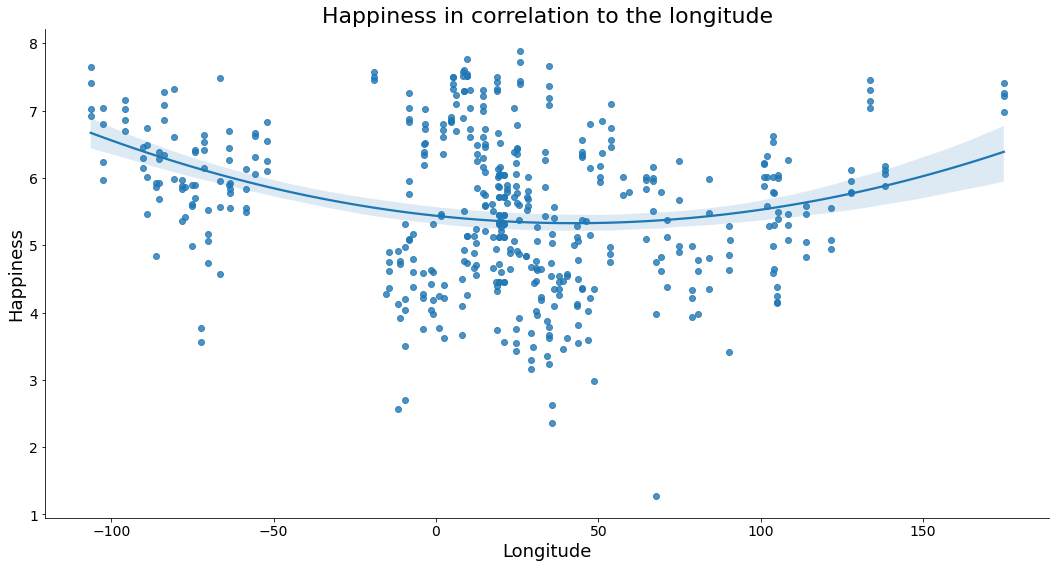

In [34]:
# Longitude
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
ax= sns.regplot(data=df_population_combined, x="longitude", y="happiness_score", order=2)

# Formatierung anpassen
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_ylim(0, 1)

plt.xlabel('Longitude')
plt.ylabel('Happiness')

plt.title('Happiness in correlation to the longitude')
plt.show()

### GDP data

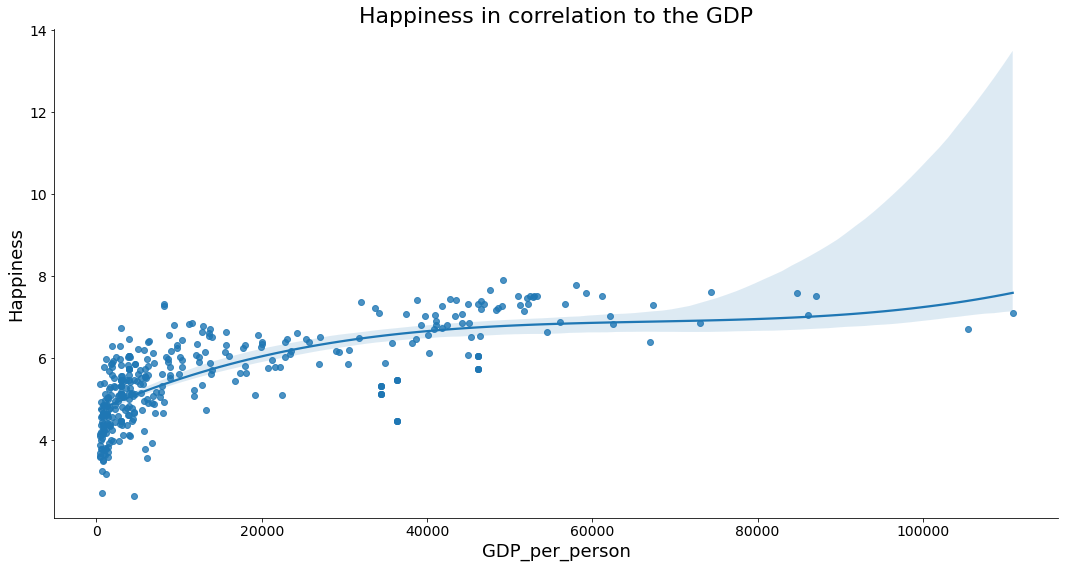

In [35]:
# GDP
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
ax= sns.regplot(data=df_gdp_combined, x="GDP_per_person", y="happiness_score", order=3)

# Formatierung anpassen
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_xlim(0, 50000000000)

plt.xlabel('GDP_per_person')
plt.ylabel('Happiness')

plt.title('Happiness in correlation to the GDP')
plt.show()

In [36]:
df_gdp_combined

# Sort the dataframe by 'country' and 'year' columns in ascending order
df_gdp_combined.sort_values(by='GDP_per_person', ascending= False)

,country,year,gdp,happiness_score,GDP_per_person
176,Luxembourg,2010,56213985987.00,7.10,110860.00
177,Luxembourg,2015,60071584216.00,6.70,105498.00
327,Switzerland,2020,752248045730.00,7.51,87080.00
143,Ireland,2020,425888950992.00,7.03,86106.00
326,Switzerland,2015,702149580771.00,7.57,84783.00
...,...,...,...,...,...
60,Central African Republic,2010,2142591376.00,3.57,460.00
178,Madagascar,2015,11323020829.00,3.59,456.00
305,Sierra Leone,2010,2578026297.00,4.13,401.00
312,Somalia,2015,5331761394.00,5.35,387.00


Text(0, 0.5, 'score')

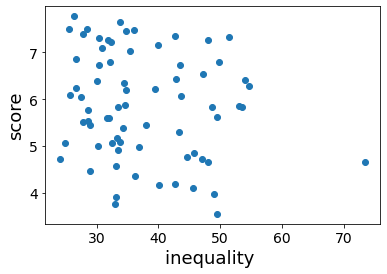

In [37]:
plt.figure()
plt.scatter(df_inequality_combined[df_inequality_combined.year == 2010]['gini_reported'], df_inequality_combined[df_inequality_combined.year == 2010]['happiness_score'])
plt.xlabel('inequality ')
plt.ylabel('score')

In [38]:
"""for df in new_dataframes:

  print("Original:")
  print(df.corr()['happiness_score'].sort_values())

  df_trans = df.copy()

  for col in df_trans.select_dtypes(include=['number']).columns:
    if col != 'happiness_score':
      df_trans[col + '_log'] = np.log(df_trans[col])
      df_trans[col + '_sq'] = df_trans[col]**2

  print("Transformed:")
  print(df_trans.corr()['happiness_score'].sort_values())

  print()"""

# von Wilma erklären lassen

'for df in new_dataframes:\n\n  print("Original:")\n  print(df.corr()[\'happiness_score\'].sort_values())\n\n  df_trans = df.copy()\n\n  for col in df_trans.select_dtypes(include=[\'number\']).columns:\n    if col != \'happiness_score\':\n      df_trans[col + \'_log\'] = np.log(df_trans[col])\n      df_trans[col + \'_sq\'] = df_trans[col]**2\n\n  print("Transformed:")\n  print(df_trans.corr()[\'happiness_score\'].sort_values())\n\n  print()'

### Inequality

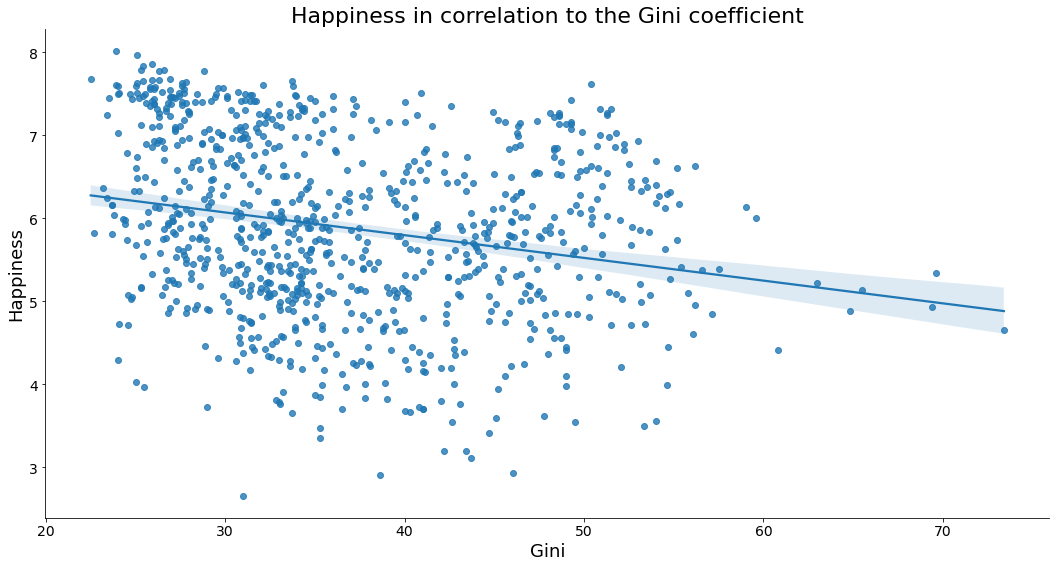

In [39]:
# Inequality
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
ax= sns.regplot(data=df_inequality_combined, x="gini_reported", y="happiness_score", order=1)

# Formatierung anpassen
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_ylim(0, 1)

plt.xlabel('Gini')
plt.ylabel('Happiness')

plt.title('Happiness in correlation to the Gini coefficient')
plt.show()

### Temperature change

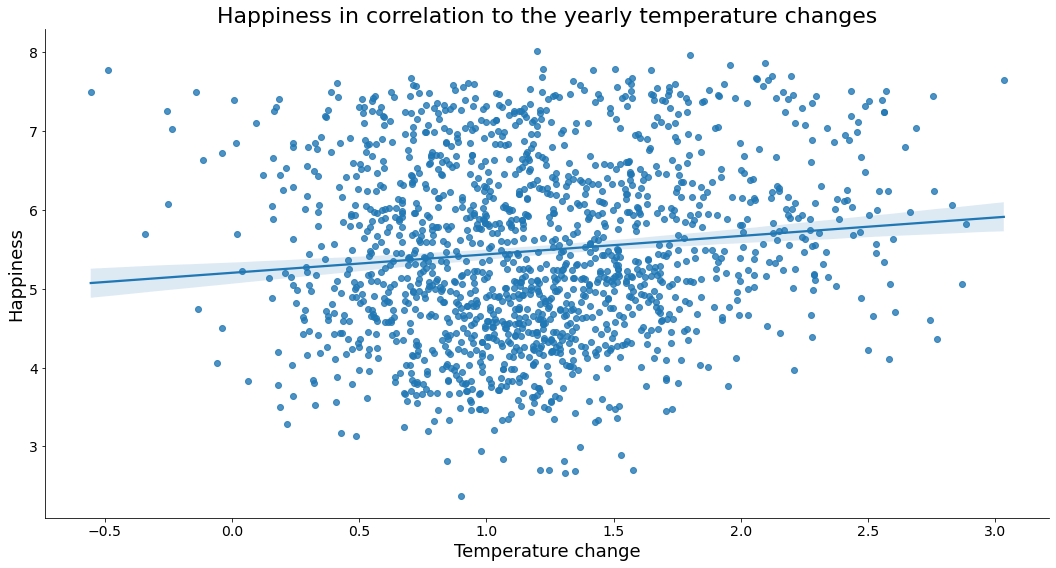

In [40]:
# Temperature developement
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
ax= sns.regplot(data=df_environment_combined, x="temperature_change", y="happiness_score", order=1)

# Formatierung anpassen
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_ylim(0, 1)

plt.xlabel('Temperature change')
plt.ylabel('Happiness')

plt.title('Happiness in correlation to the yearly temperature changes')
plt.show()

## aggregate in newly defined categories

In [42]:
# Calculate quantiles
quantiles = all_dataframes_combined['GDP_per_person'].quantile([0.33, 0.66])

# Create labels
labels = ['low', 'medium', 'high']

# Cut gdp into bins and label
all_dataframes_combined['gdp_categorical'] = pd.cut(all_dataframes_combined['GDP_per_person'], 
                                                   bins=[0, quantiles[0.33], quantiles[0.66], max(all_dataframes_combined['gdp'])],
                                                   labels=labels)


### plot happiness x predictors (GDP categories)

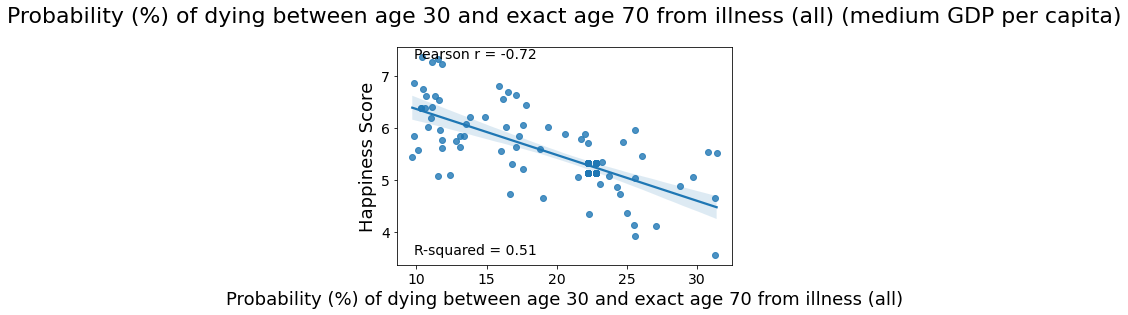

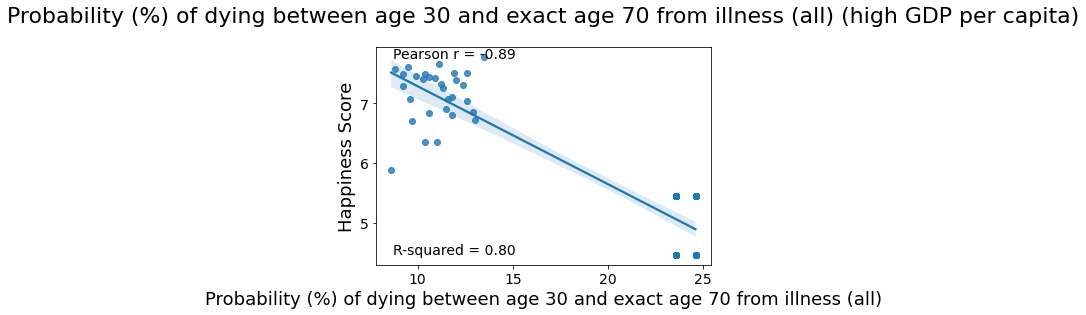

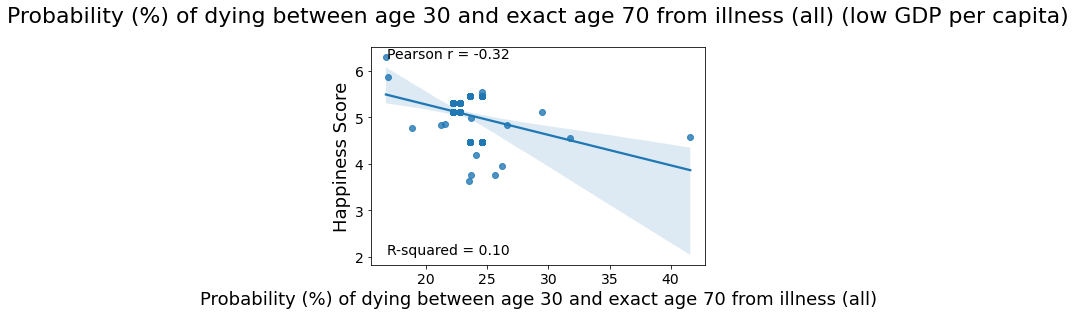

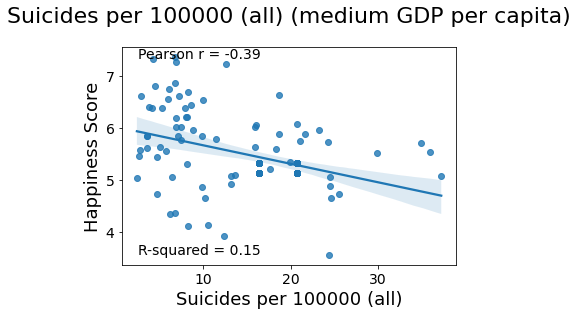

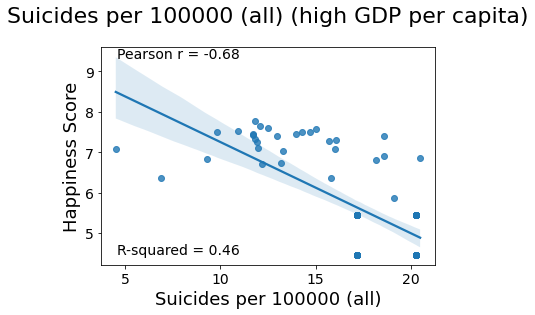

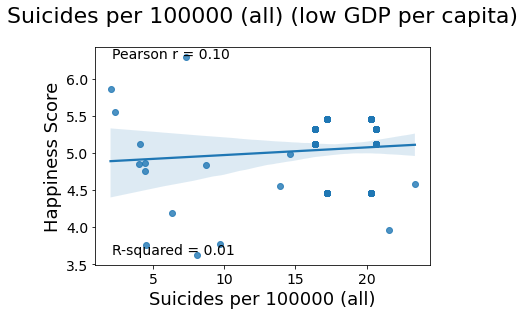

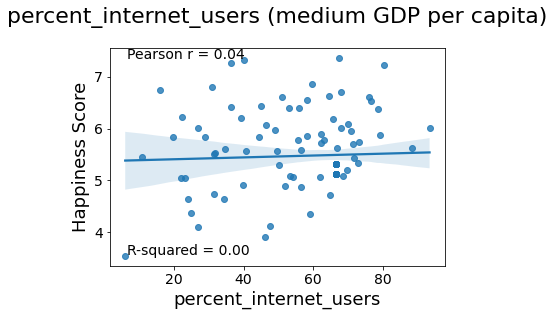

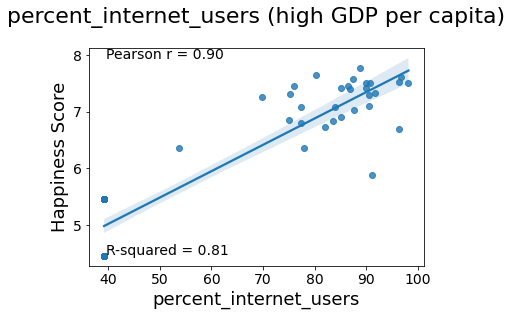

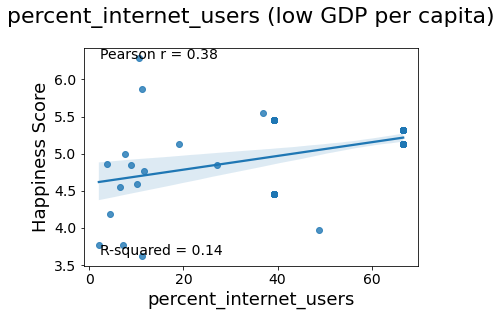

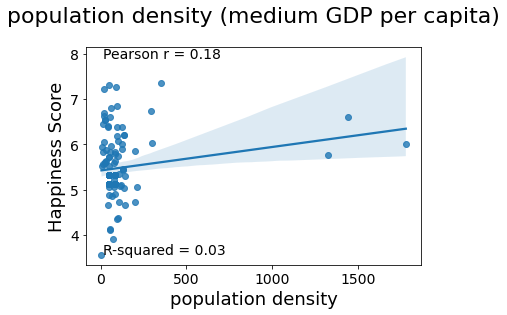

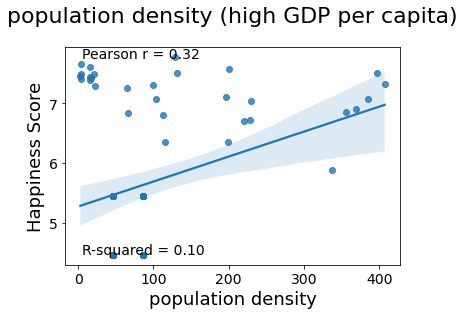

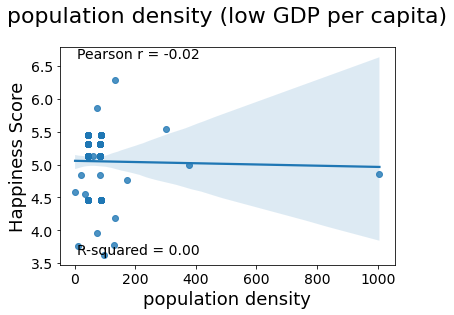

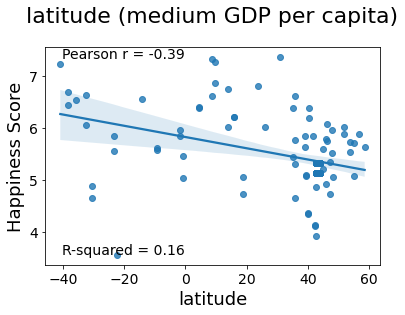

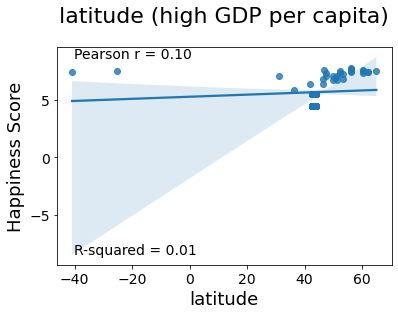

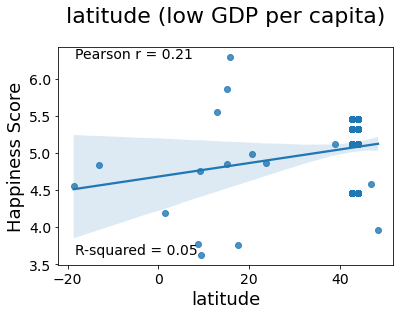

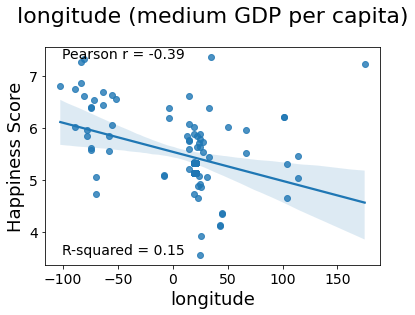

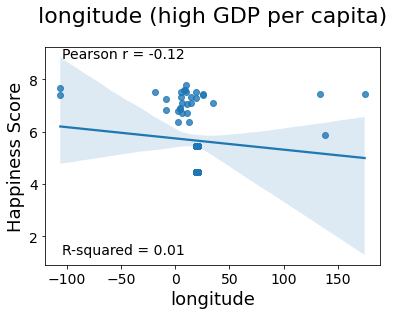

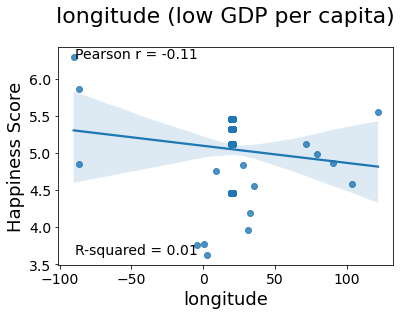

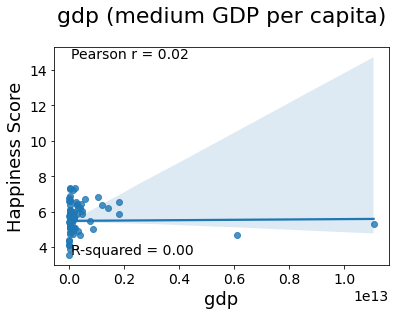

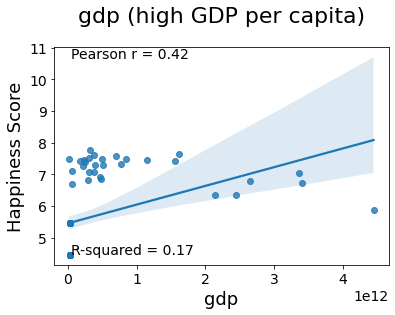

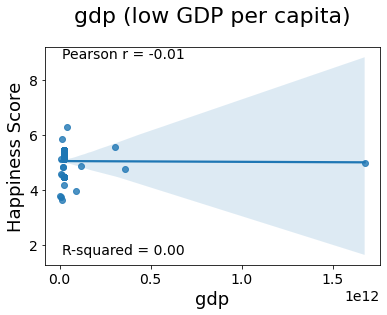

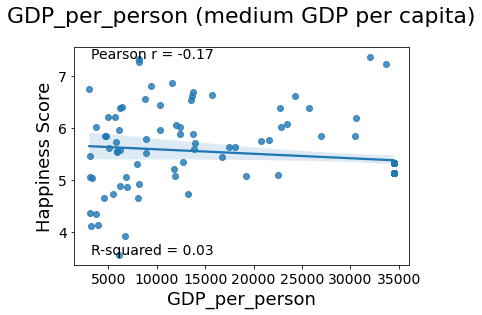

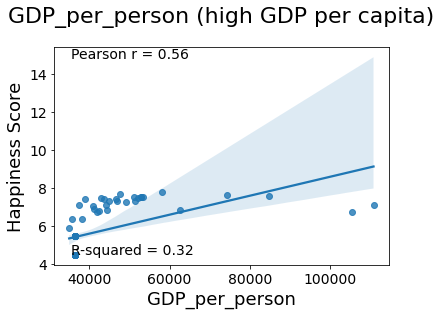

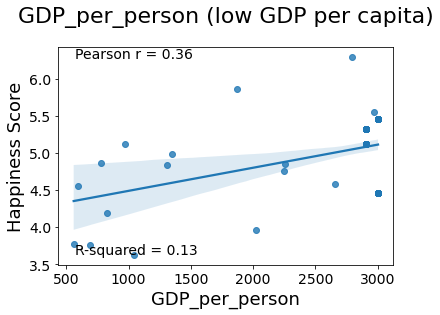

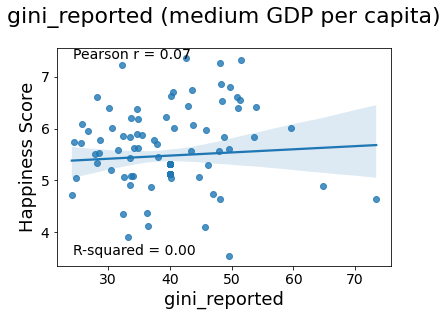

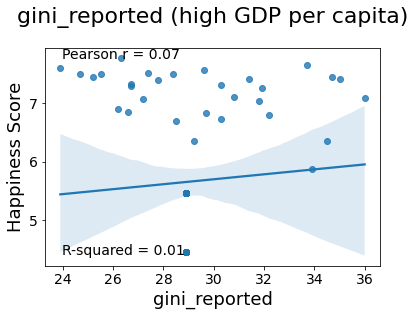

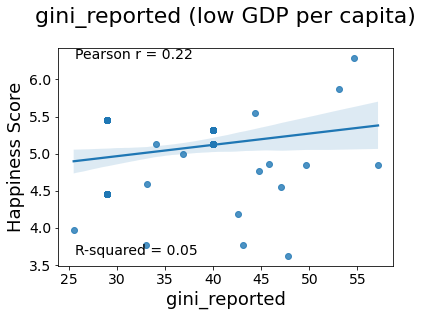

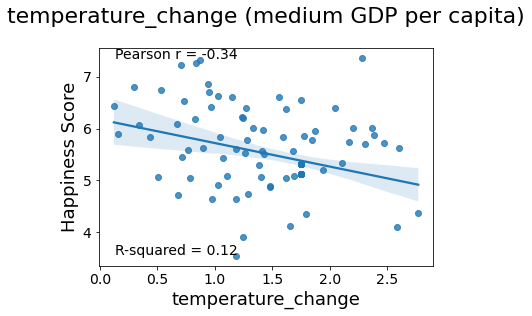

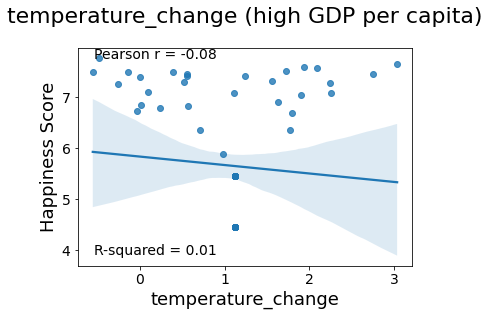

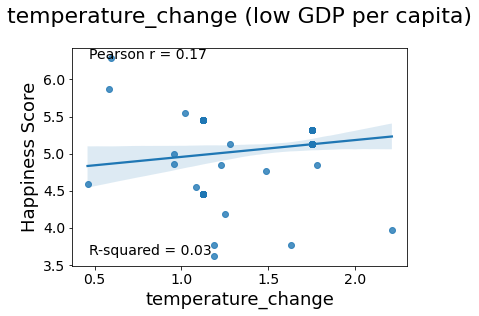

In [59]:
for predictor in ['Probability (%) of dying between age 30 and exact age 70 from illness (all)', 'Suicides per 100000 (all)',  'percent_internet_users', 'population density', 'latitude', 'longitude', 'gdp', 'GDP_per_person',
       'gini_reported', 'temperature_change']:

    for category in all_dataframes_combined['gdp_categorical'].unique():

      df_filtered = all_dataframes_combined[all_dataframes_combined['gdp_categorical'] == category]
      df_filtered = df_filtered.dropna()

      regr = LinearRegression()
      regr.fit(df_filtered[[predictor]], df_filtered['happiness_score'])

      r_squared = regr.score(df_filtered[[predictor]], df_filtered['happiness_score'])

      # Calculate correlation
      corr = np.corrcoef(df_filtered[predictor], df_filtered['happiness_score'])[0,1]

      ax = sns.regplot(data=df_filtered, x=predictor, y="happiness_score")


            # Correlation text in top left 
      ax.text(0.05, 0.95, f'Pearson r = {corr:.2f}', 
                transform=ax.transAxes, fontsize=14)

        # R-squared text in bottom left  
      ax.text(0.05, 0.05, f'R-squared = {r_squared:.2f}', 
                transform=ax.transAxes, fontsize=14)

        # Title in center top
      ax.set_title(f"{predictor} ({category} GDP per capita)", 
                     loc='center', pad=25)

      # Labels, title
     # ax.set_title(f"Temperature Change vs Happiness ({category} GDP per capita)") 
      ax.set_xlabel(predictor)
      ax.set_ylabel("Happiness Score")

      plt.show()
      print()
      print()

## Aggregate all datasets and determine main influence with ML

In [44]:
numerical_df = all_dataframes_combined.select_dtypes(include=[np.number])
numerical_df.dropna(inplace=True)
numerical_df

,year,Probability (%) of dying between age 30 and exact age 70 from illness (all),Probability (%) of dying between age 30 and exact age 70 from illness (male),Probability (%) of dying between age 30 and exact age 70 from illness (female),Suicides per 100000 (all),Suicides per 100000 (male),Suicides per 100000 (female),happiness_score,percent_internet_users,Area (km²),population,population density,latitude,longitude,gdp,GDP_per_person,gini_reported,temperature_change
0,2010,17.80,22.80,13.20,8.60,14.20,3.20,6.44,45.00,2780400,41100123,14.78,-38.42,-63.62,423627422092.00,10307.00,42.91,0.12
1,2015,16.50,20.80,12.50,8.30,13.60,3.30,6.70,68.04,2780400,43257065,15.56,-38.42,-63.62,594749285413.00,13749.00,40.53,0.94
2,2010,25.00,33.90,17.40,6.80,10.50,3.50,4.37,25.00,29743,2946293,99.06,40.07,45.04,9260284938.00,3143.00,36.20,2.77
3,2015,22.30,30.60,15.30,6.20,8.90,3.70,4.35,59.10,29743,2878595,96.78,40.07,45.04,10553337673.00,3666.00,32.36,1.79
4,2010,9.90,12.10,7.60,11.70,17.70,5.70,7.45,76.00,7692024,22019168,2.86,-25.27,133.78,1147589183476.00,52118.00,34.70,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,2010,29.70,41.40,19.90,24.50,44.00,7.70,5.06,23.30,603500,45683020,75.70,48.38,31.17,141209864408.00,3091.00,24.82,1.62
369,2015,26.20,37.50,16.80,21.60,38.90,6.70,3.96,48.88,603500,44982564,74.54,48.38,31.17,91030959455.00,2024.00,25.46,2.21
370,2010,17.60,23.40,12.40,16.00,25.40,7.20,6.06,46.40,181034,3352651,18.52,-32.52,-55.77,40284481652.00,12016.00,43.70,0.34
371,2015,17.10,21.80,12.90,18.60,30.40,7.70,6.63,64.57,181034,3402818,18.80,-32.52,-55.77,53274304222.00,15656.00,40.20,1.03


Mean happiness: 5.36
MSE: 0.29
RMSE: 0.54
Relative RMSE: 10.12 %
R²-Score 0.563


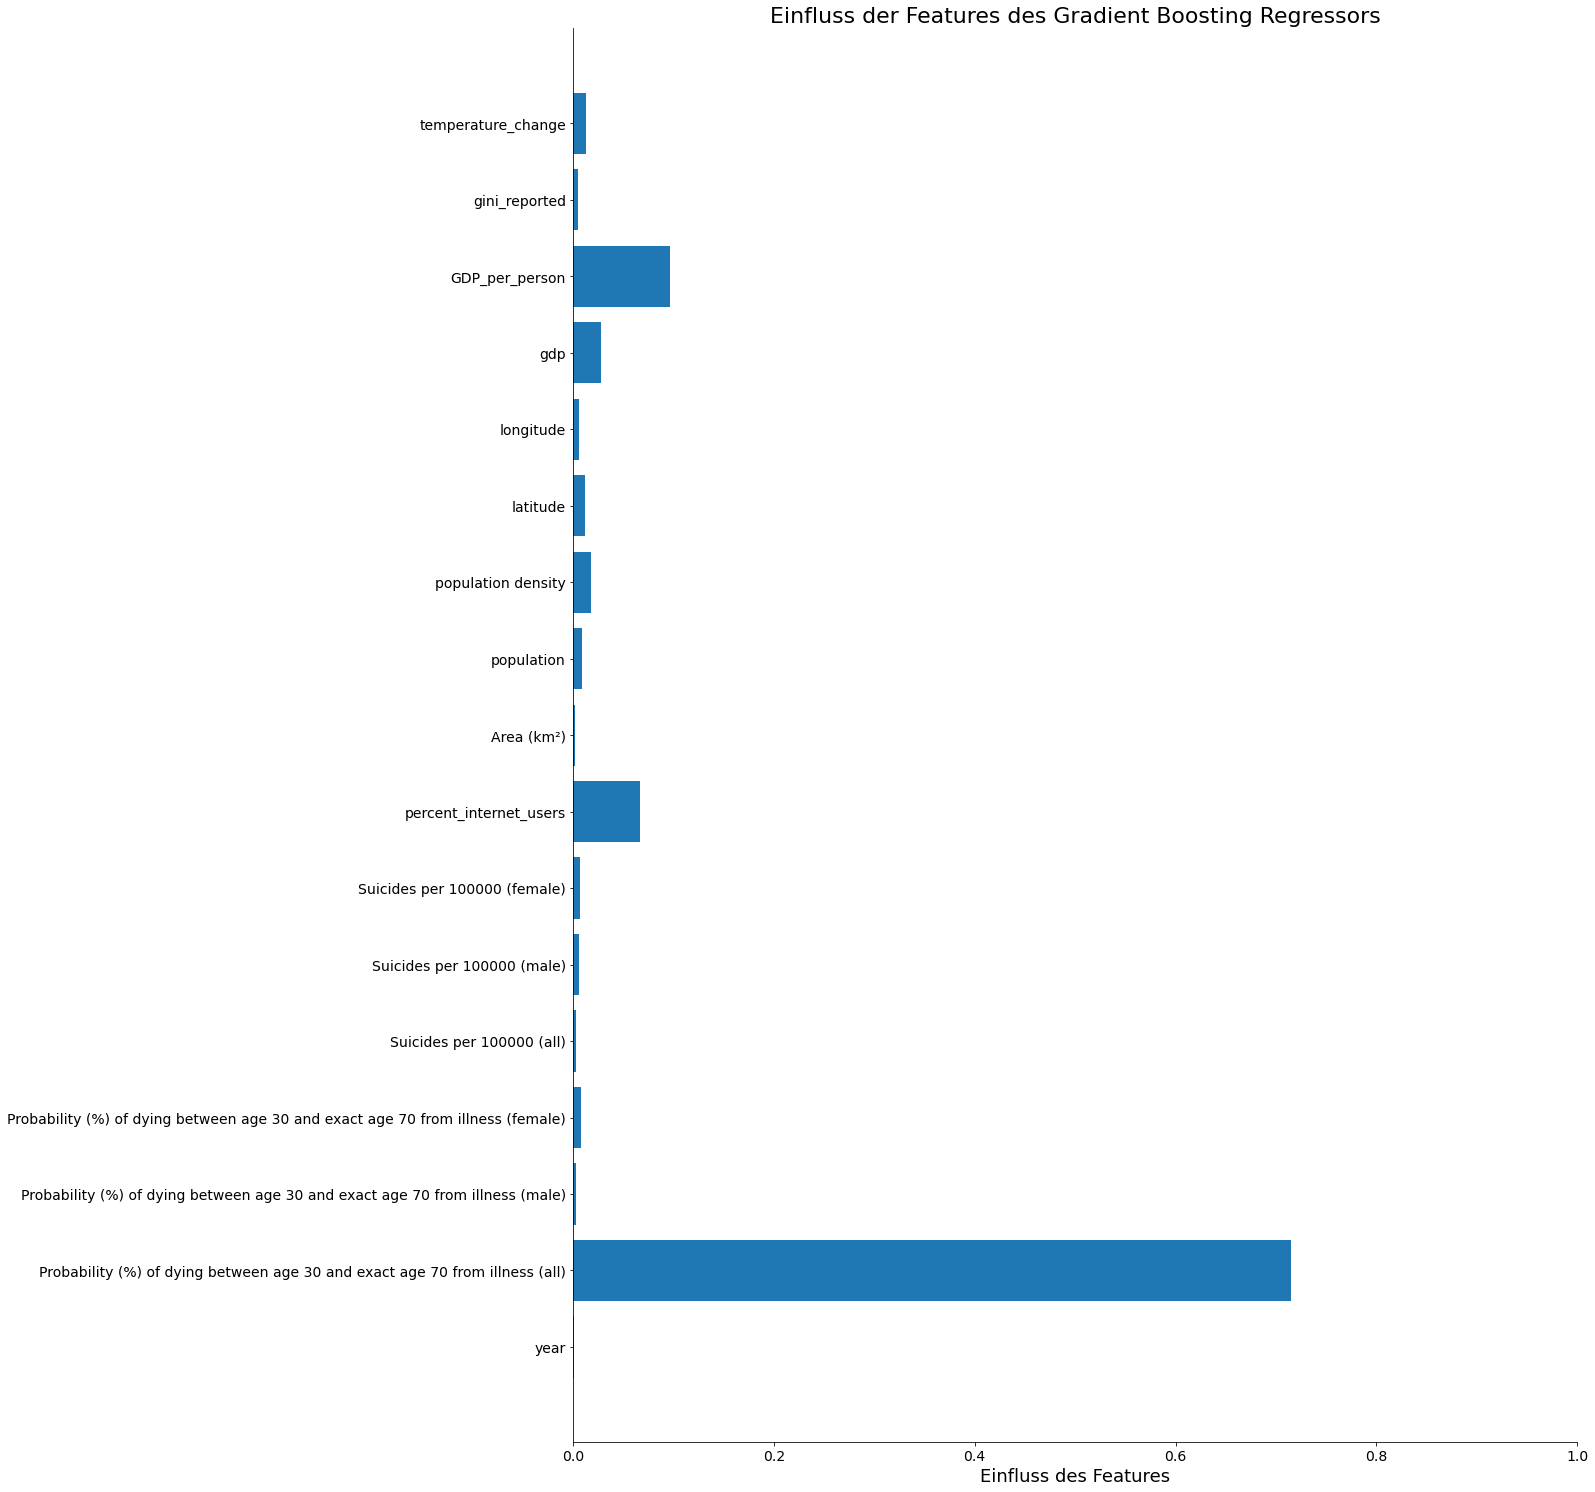

In [45]:
# ML
x = numerical_df.drop('happiness_score', axis=1)
y = numerical_df[['happiness_score']]
y = np.ravel(y)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.20, random_state=42)

#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#x_train = scaler.fit_transform(x_train)
#x_test = scaler.transform(x_test)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import GradientBoostingRegressor

ML_GradientBoostingRegressor = GradientBoostingRegressor(max_depth=5, n_estimators=150, random_state=42)
ML_GradientBoostingRegressor.fit(x_train, y_train)

y_pred=ML_GradientBoostingRegressor.predict(x_test)

print("Mean happiness:", round(numerical_df['happiness_score'].mean(), 2))
print("MSE:",round(mean_squared_error(y_test, y_pred),2))
print("RMSE:",round(np.sqrt(mean_squared_error(y_test, y_pred)),2))
print("Relative RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred)) / np.mean(numerical_df['happiness_score']) * 100, 2), "%")
print("R²-Score",round(ML_GradientBoostingRegressor.score(x_test,y_test),3))

feature_names = x.columns.tolist()

plt.figure(figsize=(18, 26))
plt.barh(range(len(ML_GradientBoostingRegressor.feature_importances_)), ML_GradientBoostingRegressor.feature_importances_)
plt.yticks(range(len(ML_GradientBoostingRegressor.feature_importances_)), feature_names) 
plt.xlim(0,1)
plt.xlabel("Einfluss des Features")

plt.gca().spines['right'].set_visible(False)  # Entfernen des rechten Rahmens
plt.gca().spines['top'].set_visible(False)  # Entfernen des oberen Rahmens

plt.title('Einfluss der Features des Gradient Boosting Regressors')
plt.show()

## trained a linear model (needs to extended though)

In [52]:
all_dataframes_combined.head()

,country,year,Probability (%) of dying between age 30 and exact age 70 from illness (all),Probability (%) of dying between age 30 and exact age 70 from illness (male),Probability (%) of dying between age 30 and exact age 70 from illness (female),Suicides per 100000 (all),Suicides per 100000 (male),Suicides per 100000 (female),happiness_score,percent_internet_users,Area (km²),population,population density,latitude,longitude,gdp,GDP_per_person,gini_reported,temperature_change,gdp_categorical
0,Argentina,2010,17.80,22.80,13.20,8.60,14.20,3.20,6.44,45.00,2780400,41100123,14.78,-38.42,-63.62,423627422092.00,10307.00,42.91,0.12,medium
1,Argentina,2015,16.50,20.80,12.50,8.30,13.60,3.30,6.70,68.04,2780400,43257065,15.56,-38.42,-63.62,594749285413.00,13749.00,40.53,0.94,medium
2,Armenia,2010,25.00,33.90,17.40,6.80,10.50,3.50,4.37,25.00,29743,2946293,99.06,40.07,45.04,9260284938.00,3143.00,36.20,2.77,medium
3,Armenia,2015,22.30,30.60,15.30,6.20,8.90,3.70,4.35,59.10,29743,2878595,96.78,40.07,45.04,10553337673.00,3666.00,32.36,1.79,medium
4,Australia,2010,9.90,12.10,7.60,11.70,17.70,5.70,7.45,76.00,7692024,22019168,2.86,-25.27,133.78,1147589183476.00,52118.00,34.70,0.56,high


In [49]:
# Select relevant columns
X = all_dataframes_combined[['Probability (%) of dying between age 30 and exact age 70 from illness (all)', 
                             'Suicides per 100000 (all)',
                             'percent_internet_users',
                             'population density',
                             'GDP_per_person',
                             'gini_reported',
                             'temperature_change', 'latitude', 'longitude']]

y = all_dataframes_combined['happiness_score']




scaler = StandardScaler()

X_scaled = X.copy()
for col in X_scaled.columns:
    X_scaled[col] = scaler.fit_transform(X_scaled[col].values.reshape(-1,1))
    
X_complete = X_scaled.dropna()
y_complete = y.loc[X_complete.index]


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_complete, y_complete, test_size=0.2, random_state=42)

# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# Check p-values of the coefficients
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()

print(est2.summary())
p_values = est2.pvalues

# Set the significance level
significance_level = 0.05

# Extract the names of significant predictors
significant_predictors = [predictor for predictor, p_value in p_values.items() if p_value < significance_level]

# Print the significant predictors
print("Significant predictors:")
for predictor in significant_predictors:
    print(predictor)
    
    

R-squared: 0.5277152159507281
                            OLS Regression Results                            
Dep. Variable:        happiness_score   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     69.38
Date:                Sun, 27 Aug 2023   Prob (F-statistic):           6.70e-67
Time:                        08:07:40   Log-Likelihood:                -175.77
No. Observations:                 298   AIC:                             371.5
Df Residuals:                     288   BIC:                             408.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

## plotted coefficients (TODO: plot residuals?)

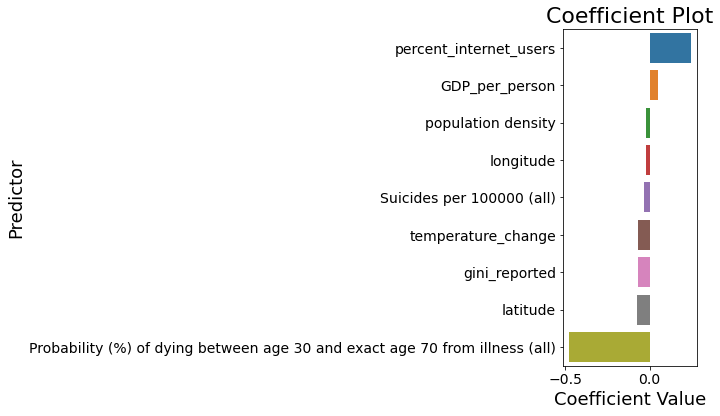

In [50]:

coefficients = model.coef_
predictor_names = X_train.columns

# Create a dataframe to store the coefficients and predictor names
coef_df = pd.DataFrame({'Predictor': predictor_names, 'Coefficient': coefficients})

# Sort the dataframe by coefficient values
sorted_coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Create the coefficient plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Predictor', data=sorted_coef_df)
plt.xlabel('Coefficient Value')
plt.ylabel('Predictor')
plt.title('Coefficient Plot')
plt.tight_layout()
plt.show()

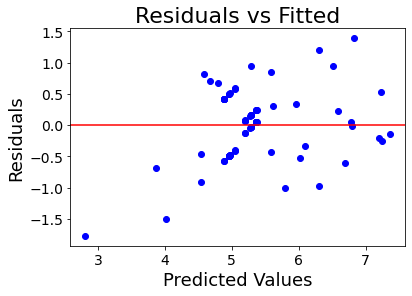

In [51]:

plt.scatter(y_pred, y_pred - y_test, c='blue') 
plt.axhline(y=0, color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

In [60]:
all_dataframes_combined

,country,year,Probability (%) of dying between age 30 and exact age 70 from illness (all),Probability (%) of dying between age 30 and exact age 70 from illness (male),Probability (%) of dying between age 30 and exact age 70 from illness (female),Suicides per 100000 (all),Suicides per 100000 (male),Suicides per 100000 (female),happiness_score,percent_internet_users,Area (km²),population,population density,latitude,longitude,gdp,GDP_per_person,gini_reported,temperature_change,gdp_categorical
0,Argentina,2010,17.80,22.80,13.20,8.60,14.20,3.20,6.44,45.00,2780400,41100123,14.78,-38.42,-63.62,423627422092.00,10307.00,42.91,0.12,medium
1,Argentina,2015,16.50,20.80,12.50,8.30,13.60,3.30,6.70,68.04,2780400,43257065,15.56,-38.42,-63.62,594749285413.00,13749.00,40.53,0.94,medium
2,Armenia,2010,25.00,33.90,17.40,6.80,10.50,3.50,4.37,25.00,29743,2946293,99.06,40.07,45.04,9260284938.00,3143.00,36.20,2.77,medium
3,Armenia,2015,22.30,30.60,15.30,6.20,8.90,3.70,4.35,59.10,29743,2878595,96.78,40.07,45.04,10553337673.00,3666.00,32.36,1.79,medium
4,Australia,2010,9.90,12.10,7.60,11.70,17.70,5.70,7.45,76.00,7692024,22019168,2.86,-25.27,133.78,1147589183476.00,52118.00,34.70,0.56,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,Ukraine,2010,29.70,41.40,19.90,24.50,44.00,7.70,5.06,23.30,603500,45683020,75.70,48.38,31.17,141209864408.00,3091.00,24.82,1.62,medium
369,Ukraine,2015,26.20,37.50,16.80,21.60,38.90,6.70,3.96,48.88,603500,44982564,74.54,48.38,31.17,91030959455.00,2024.00,25.46,2.21,low
370,Uruguay,2010,17.60,23.40,12.40,16.00,25.40,7.20,6.06,46.40,181034,3352651,18.52,-32.52,-55.77,40284481652.00,12016.00,43.70,0.34,medium
371,Uruguay,2015,17.10,21.80,12.90,18.60,30.40,7.70,6.63,64.57,181034,3402818,18.80,-32.52,-55.77,53274304222.00,15656.00,40.20,1.03,medium


# Visualizations